<a href="https://colab.research.google.com/github/sprashant19/Energy-Efficiency/blob/main/Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [279]:
df=pd.read_csv("/content/ENB2012_data.xlsx - Φύλλο1.csv")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Data Cleaning

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [281]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [282]:
#Converting Y1 and Y2 to integer type
df.Y1=df.Y1.astype('int64')
df.Y2=df.Y2.astype('int64')

In [283]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15,21
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15,21
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15,21
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15,21
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20,28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17,21
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16,16
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16,17
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16,16


In [284]:
df.Y1.unique()

array([15, 20, 21, 19, 18, 17, 16, 28, 29, 24, 23,  6,  7, 10,  8, 26, 25,
       22, 35, 37, 36, 32, 11, 12, 13, 27, 33, 30, 38, 40, 39, 31, 14, 41,
       42, 43, 34])

In [285]:
df.Y2.unique()

array([21, 28, 25, 29, 27, 23, 24, 37, 31, 30, 39, 10, 11, 12, 16, 26, 32,
       34, 41, 35, 43, 33, 13, 14, 19, 42, 15, 36, 45, 20, 44, 40, 38, 46,
       17, 18, 22, 48, 47])

Exploratory Data Analysis

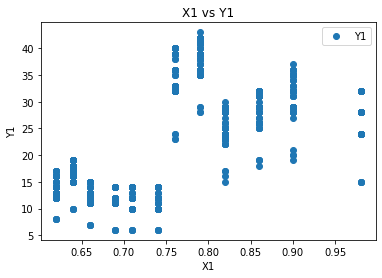

,X1,Y1
X1,1.000000,0.623778
Y1,0.623778,1.000000


In [286]:
df.plot(x='X1',y="Y1",style='o')
plt.title("X1 vs Y1")
plt.xlabel("X1")
plt.ylabel("Y1")
plt.show()
df[["X1","Y1"]].corr()

There is a high correlation between the data, so there is no need for transformation.

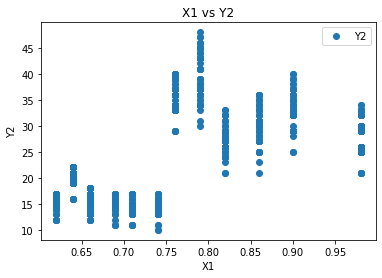

,X1,Y2
X1,1.000000,0.632969
Y2,0.632969,1.000000


In [287]:
df.plot(x='X1',y="Y2",style='o')
plt.title("X1 vs Y2")
plt.xlabel("X1")
plt.ylabel("Y2")
plt.show()
df[["X1","Y2"]].corr()

There is a high correlation between the data, so there is no need for transformation

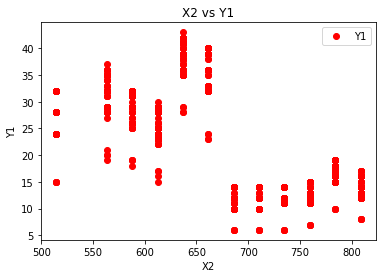

,X2,Y1
X2,1.000000,-0.659464
Y1,-0.659464,1.000000


In [288]:
df.plot(x='X2',y="Y1",style='o',color='red')
plt.title("X2 vs Y1")
plt.xlabel("X2")
plt.ylabel("Y1")
plt.show()
df[["X2","Y1"]].corr()

There is high negative correlation between X2 and Y1.

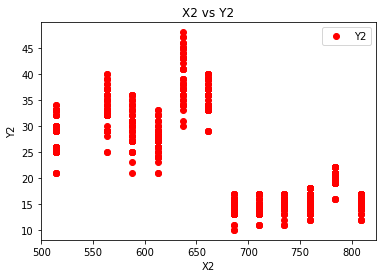

,X2,Y2
X2,1.000000,-0.671381
Y2,-0.671381,1.000000


In [289]:
df.plot(x='X2',y="Y2",style='o',color='red')
plt.title("X2 vs Y2")
plt.xlabel("X2")
plt.ylabel("Y2")
plt.show()
df[["X2","Y2"]].corr()

There is high negative correlation between X2 and Y2.

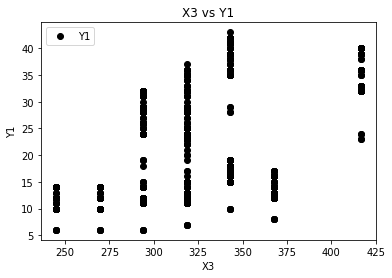

,X3,Y1
X3,1.000000,0.453219
Y1,0.453219,1.000000


In [290]:
df.plot(x='X3',y="Y1",style='o',color='black')
plt.title("X3 vs Y1")
plt.xlabel("X3")
plt.ylabel("Y1")
plt.show()
df[["X3","Y1"]].corr()

There is a low correaltion between X3 and Y1, there is a need for transformation.

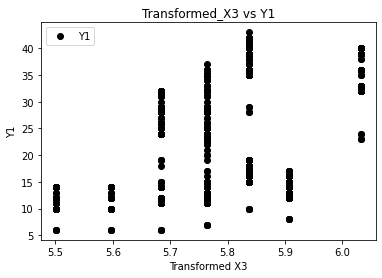

,Transformed_X3,Y1
Transformed_X3,1.000000,0.459215
Y1,0.459215,1.000000


In [291]:
df["Transformed_X3"]=np.log(df['X3'])
df.plot(x="Transformed_X3",y="Y1",style='o',color='black')
plt.title("Transformed_X3 vs Y1")
plt.xlabel("Transformed X3")
plt.ylabel("Y1")
plt.show()
df[["Transformed_X3","Y1"]].corr()

Among the transformation, logrithmic transformation has better correlation.

---



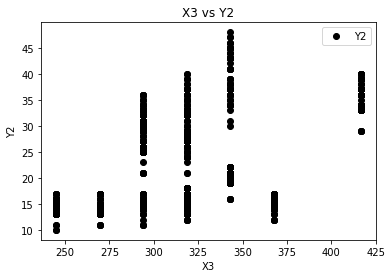

,X3,Y2
X3,1.000000,0.428334
Y2,0.428334,1.000000


In [292]:
df.plot(x='X3',y="Y2",style='o',color='black')
plt.title("X3 vs Y2")
plt.xlabel("X3")
plt.ylabel("Y2")
plt.show()
df[["X3","Y2"]].corr()

There is a low correaltion between X3 and Y2, there is a need for transformation.

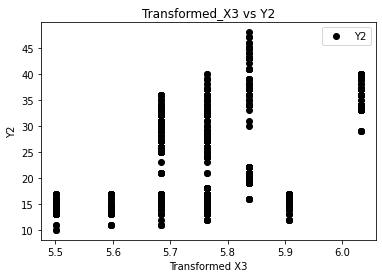

,Transformed_X3,Y2
Transformed_X3,1.000000,0.436767
Y2,0.436767,1.000000


In [293]:
df["Transformed_X3"]=np.log(df['X3'])
df.plot(x="Transformed_X3",y="Y2",style='o',color='black')
plt.title("Transformed_X3 vs Y2")
plt.xlabel("Transformed X3")
plt.ylabel("Y2")
plt.show()
df[["Transformed_X3","Y2"]].corr()

Among the transformation, logrithmic transformation has better correlation.

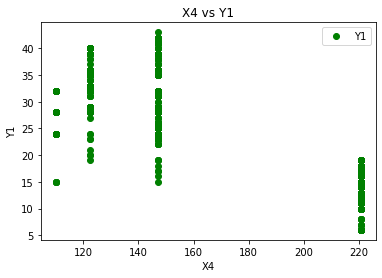

,X4,Y1
X4,1.000000,-0.861955
Y1,-0.861955,1.000000


In [294]:
df.plot(x='X4',y="Y1",style='o',color='green')
plt.title("X4 vs Y1")
plt.xlabel("X4")
plt.ylabel("Y1")
plt.show()
df[["X4","Y1"]].corr()

There is high negative correlation between X2 and Y2.

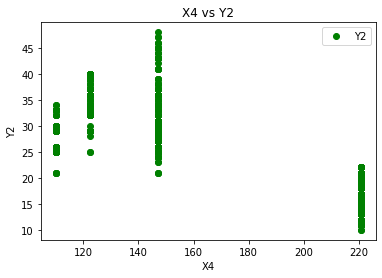

,X4,Y2
X4,1.000000,-0.861557
Y2,-0.861557,1.000000


In [295]:
df.plot(x='X4',y="Y2",style='o',color='green')
plt.title("X4 vs Y2")
plt.xlabel("X4")
plt.ylabel("Y2")
plt.show()
df[["X4","Y2"]].corr()

There is high negative correlation between X2 and Y2.

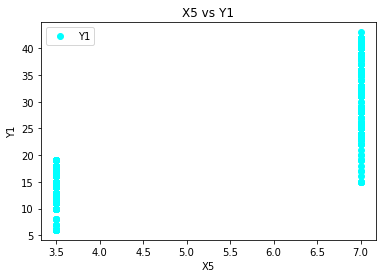

,X5,Y1
X5,1.000000,0.889308
Y1,0.889308,1.000000


In [296]:
df.plot(x='X5',y="Y1",style='o',color='cyan')
plt.title("X5 vs Y1")
plt.xlabel("X5")
plt.ylabel("Y1")
plt.show()
df[["X5","Y1"]].corr()

There is a positive correlation between X5 and Y1.

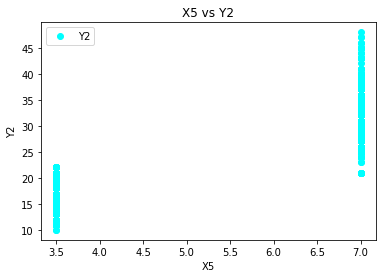

,X5,Y2
X5,1.000000,0.894514
Y2,0.894514,1.000000


In [297]:
df.plot(x='X5',y="Y2",style='o',color='cyan')
plt.title("X5 vs Y2")
plt.xlabel("X5")
plt.ylabel("Y2")
plt.show()
df[["X5","Y2"]].corr()

There is a positive correlation between X5 and Y2.

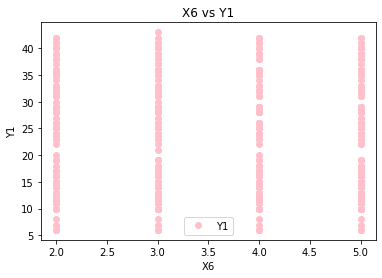

,X6,Y1
X6,1.000000,-0.001041
Y1,-0.001041,1.000000


In [298]:
df.plot(x='X6',y="Y1",style='o',color='pink')
plt.title("X6 vs Y1")
plt.xlabel("X6")
plt.ylabel("Y1")
plt.show()
df[["X6","Y1"]].corr()

There is a poor correlation between X6 and Y1, so transformation is required.

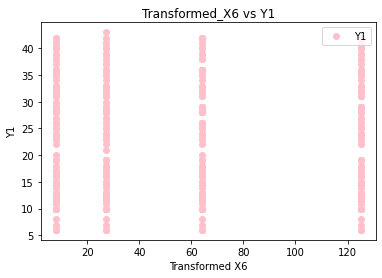

,Transformed_X6,Y1
Transformed_X6,1.000000,-0.001696
Y1,-0.001696,1.000000


In [299]:
df["Transformed_X6"]=np.power(df['X6'],3)
df.plot(x="Transformed_X6",y="Y1",style='o',color='pink')
plt.title("Transformed_X6 vs Y1")
plt.xlabel("Transformed X6")
plt.ylabel("Y1")
plt.show()
df[["Transformed_X6","Y1"]].corr()

Among the transformation,X to the power of 3 has best correlation.

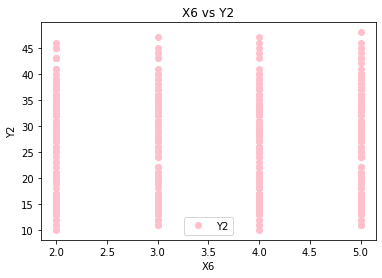

,X6,Y2
X6,1.000000,0.015556
Y2,0.015556,1.000000


In [300]:
df.plot(x='X6',y="Y2",style='o',color='pink')
plt.title("X6 vs Y2")
plt.xlabel("X6")
plt.ylabel("Y2")
plt.show()
df[["X6","Y2"]].corr()

There is a poor correlation between X6 and Y2, transformation required.

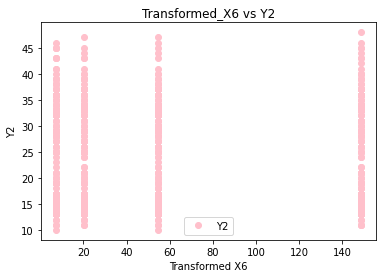

,Transformed_X6,Y2
Transformed_X6,1.000000,0.021462
Y2,0.021462,1.000000


In [301]:
df["Transformed_X6"]=np.exp(df['X6'])
df.plot(x="Transformed_X6",y="Y2",style='o',color='pink')
plt.title("Transformed_X6 vs Y2")
plt.xlabel("Transformed X6")
plt.ylabel("Y2")
plt.show()
df[["Transformed_X6","Y2"]].corr()

Among the transformation, exponential transformation has best correlation.

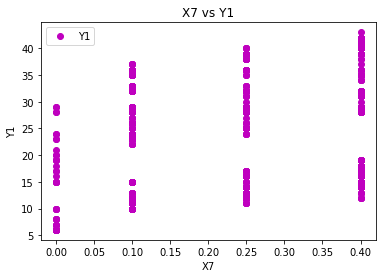

,X7,Y1
X7,1.000000,0.268968
Y1,0.268968,1.000000


In [302]:
df.plot(x='X7',y="Y1",style='o',color='m')
plt.title("X7 vs Y1")
plt.xlabel("X7")
plt.ylabel("Y1")
plt.show()
df[["X7","Y1"]].corr()

X7 vs y1 has poor correlation, transformation required.

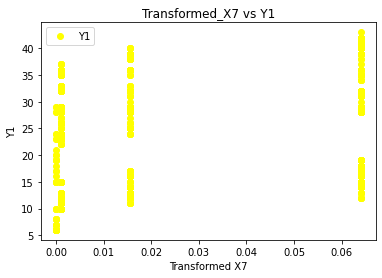

,Transformed_X7,Y1
Transformed_X7,1.000000,0.234245
Y1,0.234245,1.000000


In [303]:
df["Transformed_X7"]=np.power(df['X7'],3)
df.plot(x="Transformed_X7",y="Y1",style='o',color='yellow')
plt.title("Transformed_X7 vs Y1")
plt.xlabel("Transformed X7")
plt.ylabel("Y1")
plt.show()
df[["Transformed_X7","Y1"]].corr()

X7 vs Y1 has a poor correlation, also transformed X7 has poor correlation with Y1. So using the X7 as one of the feature.

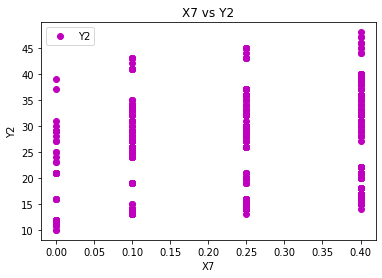

,X7,Y2
X7,1.000000,0.206848
Y2,0.206848,1.000000


In [304]:
df.plot(x='X7',y="Y2",style='o',color='m')
plt.title("X7 vs Y2")
plt.xlabel("X7")
plt.ylabel("Y2")
plt.show()
df[["X7","Y2"]].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


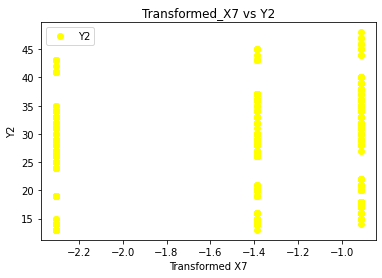

,Transformed_X7,Y2
Transformed_X7,1.000000,0.166803
Y2,0.166803,1.000000


In [305]:
df["Transformed_X7"]=np.log(df['X7'])
df.plot(x="Transformed_X7",y="Y2",style='o',color='yellow')
plt.title("Transformed_X7 vs Y2")
plt.xlabel("Transformed X7")
plt.ylabel("Y2")
plt.show()
df[["Transformed_X7","Y2"]].corr()

X7 vs Y2 has a poor correlation, also transformed X7 has poor correlation with Y2. So using the X7 as one of the feature.

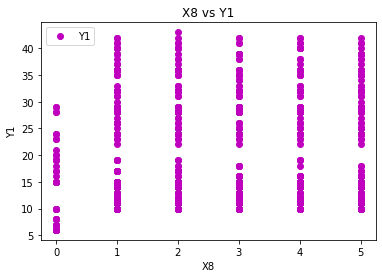

,X8,Y1
X8,1.000000,0.088832
Y1,0.088832,1.000000


In [306]:
df.plot(x='X8',y="Y1",style='o',color='m')
plt.title("X8 vs Y1")
plt.xlabel("X8")
plt.ylabel("Y1")
plt.show()
df[["X8","Y1"]].corr()

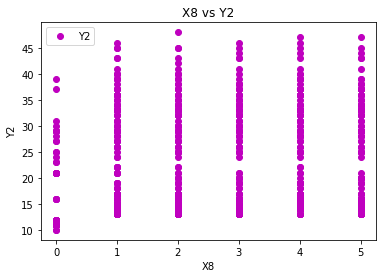

,X8,Y2
X8,1.000000,0.051786
Y2,0.051786,1.000000


In [307]:
df.plot(x='X8',y="Y2",style='o',color='m')
plt.title("X8 vs Y2")
plt.xlabel("X8")
plt.ylabel("Y2")
plt.show()
df[["X8","Y2"]].corr()

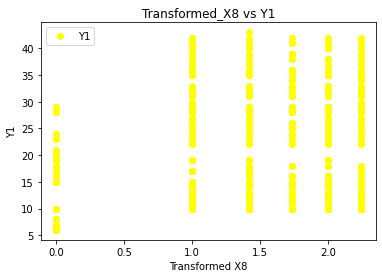

,Transformed_X8,Y1
Transformed_X8,1.00000,0.13672
Y1,0.13672,1.00000


In [308]:
df["Transformed_X8"]=np.sqrt(df['X8'])
df.plot(x="Transformed_X8",y="Y1",style='o',color='yellow')
plt.title("Transformed_X8 vs Y1")
plt.xlabel("Transformed X8")
plt.ylabel("Y1")
plt.show()
df[["Transformed_X8","Y1"]].corr()

Among the transformation, square root transformation has best correlation.

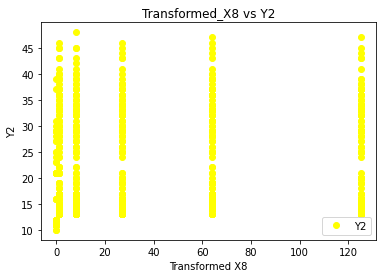

,Transformed_X8,Y2
Transformed_X8,1.000000,0.022543
Y2,0.022543,1.000000


In [309]:
df["Transformed_X8"]=np.power(df['X8'],3)
df.plot(x="Transformed_X8",y="Y2",style='o',color='yellow')
plt.title("Transformed_X8 vs Y2")
plt.xlabel("Transformed X8")
plt.ylabel("Y2")
plt.show()
df[["Transformed_X8","Y2"]].corr()

The correlation between X8 and Y2 is poor, also the transformation of X8 has not provided good relation.

In [310]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Transformed_X3,Transformed_X6,Transformed_X7,Transformed_X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15,21,5.683580,7.389056,-inf,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15,21,5.683580,20.085537,-inf,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15,21,5.683580,54.598150,-inf,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15,21,5.683580,148.413159,-inf,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20,28,5.763622,7.389056,-inf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17,21,5.837730,148.413159,-0.916291,125
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16,16,5.906723,7.389056,-0.916291,125
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16,17,5.906723,20.085537,-0.916291,125
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16,16,5.906723,54.598150,-0.916291,125


**Model Training**

Preparing the Data

In [311]:
x1=df[['X1','X2','Transformed_X3','X4','X5','Transformed_X6','X7','Transformed_X8']].values
y1=df['Y1'].values
x2=df[['X1','X2','Transformed_X3','X4','X5','Transformed_X6','X7','X8']].values
y2=df['Y2'].values

Splitting the Data

In [312]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25)    #Splitting data for Y1 
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.25)    #Splitting data for Y2

Scaling the Data

In [313]:
#Scaling data for Y1
scaler=StandardScaler()
scaler.fit(x1_train,y1_train)
x1_train_scaled=scaler.transform(x1_train)
x1_test_scaled=scaler.transform(x1_test)


In [314]:
#Scaling data for Y2
scaler.fit(x2_train,y2_train)
x2_train_scaled=scaler.transform(x2_train)
x2_test_scaled=scaler.transform(x2_test)

**Linear Regression**

In [315]:
#Model training for Y1
regressor=LinearRegression()
regressor.fit(x1_train_scaled,y1_train)

LinearRegression()

In [316]:
#Model training for Y2
regressor=LinearRegression()
regressor.fit(x2_train_scaled,y2_train)

LinearRegression()

In [317]:
#Coefficient value for Y1
coeff_df1=pd.DataFrame(regressor.coef_,['X1','X2','Transformed_X3','X4','X5','Transformed_X6','X7','Transformed_X8'],columns=["Coefficient"])
coeff_df1

,Coefficient
X1,-9.134186
X2,-14.263390
Transformed_X3,4.518893
X4,3.376742
X5,5.565655
Transformed_X6,0.324232
X7,2.026622
Transformed_X8,0.096312


In [318]:
y1_predlir=regressor.predict(x1_test_scaled)


In [319]:
df1=pd.DataFrame({'Actual':y1_test,'Predicted':y1_predlir})
df1

,Actual,Predicted
0,11,13.500764
1,15,15.732821
2,12,15.937887
3,12,15.182077
4,19,26.870345
...,...,...
187,12,16.613710
188,12,13.489693
189,32,32.754496
190,40,34.717922


In [320]:
print("R2 Score : ",metrics.r2_score(y1_test,y1_predlir))

R2 Score :  0.8592158885764636


For Target Y2

In [321]:
#Coefficient for Y2
coeff_df2=pd.DataFrame(regressor.coef_,['X1','X2','Transformed_X3','X4','X5','Transformed_X6','X7','X8'],columns=["Coefficient"])
coeff_df2

,Coefficient
X1,-9.134186
X2,-14.263390
Transformed_X3,4.518893
X4,3.376742
X5,5.565655
Transformed_X6,0.324232
X7,2.026622
X8,0.096312


In [322]:
y2_predlir=regressor.predict(x2_test_scaled)

In [323]:
df2=pd.DataFrame({'Actual':y2_test,'Predicted':y2_predlir})
df2

,Actual,Predicted
0,14,13.304711
1,32,35.506463
2,21,19.067031
3,13,11.208540
4,14,14.643230
...,...,...
187,14,12.699162
188,27,30.445314
189,14,13.643167
190,30,32.941588


In [324]:
print("R2 Score : ",metrics.r2_score(y2_test,y2_predlir))

R2 Score :  0.8759474499012134


**Logistic Regression**

In [325]:
#Model training for Y1
log_reg=LogisticRegression()
log_reg.fit(x1_train_scaled,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [326]:
y1_predlog=log_reg.predict(x1_test_scaled)

In [327]:
df3=pd.DataFrame({'Actual':y1_test,'Predicted':y1_predlog})
df3

,Actual,Predicted
0,11,11
1,15,11
2,12,12
3,12,15
4,19,26
...,...,...
187,12,12
188,12,12
189,32,32
190,40,36


In [328]:
print("R2 Score : ",metrics.r2_score(y1_test,y1_predlog))

R2 Score :  0.890369474973359


For Y2 target

In [329]:
#Model training for Y2
log_reg=LogisticRegression()
log_reg.fit(x2_train_scaled,y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [330]:
y2_predlog=log_reg.predict(x2_test_scaled)

In [331]:
#Coeeficient for Y1
log_reg.coef_

array([[ 0.04789084, -0.09001597, -1.57178505,  0.57890789, -0.66910917,
        -0.43664868, -1.39924142, -1.11724446],
       [-0.19619292,  0.10350937, -1.46500227,  0.84012545, -0.99114336,
         0.0560916 , -2.18080801, -1.85561192],
       [-0.58726105,  0.54903459, -0.1938656 ,  0.68920107, -0.78126015,
        -0.04219734, -1.85357887, -1.60769463],
       [-0.32675492,  0.50207243, -1.68253514,  0.94118526, -1.1314238 ,
        -0.19588049, -2.50946646,  0.87619768],
       [-0.4001378 ,  0.81877831, -0.69946737,  1.02524416, -1.2225807 ,
        -0.23082017, -1.92868248,  0.95068041],
       [-0.44741606,  0.6307318 , -0.99182564,  0.92232318, -1.10553537,
        -0.10211703, -0.0359557 ,  0.20928793],
       [-0.37459245,  0.81606619, -0.79522393,  0.89020377, -1.06716541,
        -0.11262444,  1.01904941,  0.23101929],
       [-0.67936585,  0.58156791, -0.5648266 ,  0.82125966, -0.98725249,
        -0.12589946,  2.84040696, -0.30620826],
       [-0.75418822,  0.38535096

In [332]:
#Intercept for Y1
log_reg.intercept_

array([-1.95093227, -2.99384036, -2.35046746,  0.06999979,  1.02317723,
        1.96706244,  1.46507842, -0.58720889, -0.44568095,  0.03750036,
        0.51941616,  1.63107633, -0.90141972, -1.34974692,  0.47709407,
       -1.50320929,  0.72182643,  1.36044476,  1.57865119,  1.02870622,
        0.56126601,  0.89747594,  0.27552492, -0.71951384,  0.97970646,
        0.93394216,  1.00777204,  0.60527474, -0.55240288, -0.70860395,
       -1.92735071,  0.24888623,  0.61864803, -0.49694637,  0.36059819,
       -0.20669689, -0.60917032, -1.06593732])

In [333]:
df4=pd.DataFrame({'Actual':y2_test,'Predicted':y2_predlog})
df4

,Actual,Predicted
0,14,15
1,32,36
2,21,16
3,13,13
4,14,14
...,...,...
187,14,13
188,27,30
189,14,13
190,30,31


In [334]:
print("R2 Score : ",metrics.r2_score(y2_test,y2_predlog))

R2 Score :  0.8506177418198765


K-Nearest Neighbour

In [335]:
#Model training for Y1
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x1_train_scaled,y1_train)

KNeighborsRegressor(n_neighbors=3)

In [336]:
y1_predknn=knn.predict(x1_test_scaled)

In [337]:
df5=pd.DataFrame({'Actual':y1_test,'Predicted':y1_predknn})
df5

,Actual,Predicted
0,11,11.000000
1,15,14.000000
2,12,12.333333
3,12,13.000000
4,19,21.000000
...,...,...
187,12,12.000000
188,12,12.000000
189,32,29.666667
190,40,30.000000


In [338]:
print("R2 Score : ",metrics.r2_score(y1_test,y1_predknn))

R2 Score :  0.9300233097761449


For Y2 Target

In [339]:
#Model training for Y2
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x2_train_scaled,y2_train)

KNeighborsRegressor(n_neighbors=3)

In [340]:
y2_predknn=knn.predict(x2_test_scaled)

In [341]:
df6=pd.DataFrame({'Actual':y2_test,'Predicted':y2_predknn})
df6

,Actual,Predicted
0,14,14.000000
1,32,37.666667
2,21,18.000000
3,13,13.000000
4,14,15.666667
...,...,...
187,14,13.333333
188,27,29.666667
189,14,14.666667
190,30,32.333333


In [342]:
print("R2 Score : ",metrics.r2_score(y2_test,y2_predknn))

R2 Score :  0.9043646458737258


**Decision Tree**

In [343]:
#Model training for Y1
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(x1_train_scaled,y1_train)

DecisionTreeRegressor(max_depth=3)

In [344]:
y1_preddtr=dtr.predict(x1_test_scaled)

In [345]:
df7=pd.DataFrame({'Actual':y1_test,'Predicted':y1_preddtr})
df7

,Actual,Predicted
0,11,11.541667
1,15,11.541667
2,12,12.983051
3,12,11.541667
4,19,23.853333
...,...,...
187,12,12.983051
188,12,12.983051
189,32,30.058333
190,40,37.275862


In [346]:
print("R2 Score : ",metrics.r2_score(y1_test,y1_preddtr))

R2 Score :  0.9336544191757209


[Text(0.5, 0.875, 'X[0] <= -0.14\nsquared_error = 100.731\nsamples = 576\nvalue = 21.594'),
 Text(0.25, 0.625, 'X[6] <= -0.416\nsquared_error = 7.198\nsamples = 289\nvalue = 12.72'),
 Text(0.125, 0.375, 'X[7] <= -0.917\nsquared_error = 5.612\nsamples = 116\nvalue = 10.793'),
 Text(0.0625, 0.125, 'squared_error = 2.36\nsamples = 20\nvalue = 7.2'),
 Text(0.1875, 0.125, 'squared_error = 3.04\nsamples = 96\nvalue = 11.542'),
 Text(0.375, 0.375, 'X[0] <= -1.097\nsquared_error = 4.104\nsamples = 173\nvalue = 14.012'),
 Text(0.3125, 0.125, 'squared_error = 3.189\nsamples = 55\nvalue = 16.218'),
 Text(0.4375, 0.125, 'squared_error = 1.203\nsamples = 118\nvalue = 12.983'),
 Text(0.75, 0.625, 'X[1] <= -0.532\nsquared_error = 35.768\nsamples = 287\nvalue = 30.53'),
 Text(0.625, 0.375, 'X[6] <= -0.416\nsquared_error = 19.626\nsamples = 195\nvalue = 27.672'),
 Text(0.5625, 0.125, 'squared_error = 12.685\nsamples = 75\nvalue = 23.853'),
 Text(0.6875, 0.125, 'squared_error = 9.155\nsamples = 120\nval

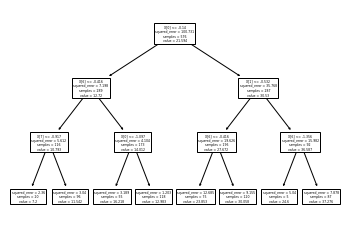

In [347]:
tree.plot_tree(dtr)

For Y2 target

In [348]:
#Model training for Y2
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(x2_train_scaled,y2_train)

DecisionTreeRegressor(max_depth=3)

In [349]:
y2_preddtr=dtr.predict(x2_test_scaled)

In [350]:
df8=pd.DataFrame({'Actual':y2_test,'Predicted':y2_preddtr})
df8

,Actual,Predicted
0,14,15.831933
1,32,31.487603
2,21,18.296296
3,13,12.986486
4,14,16.085714
...,...,...
187,14,12.986486
188,27,31.487603
189,14,15.831933
190,30,31.487603


In [351]:
print("R2 Score : ",metrics.r2_score(y2_test,y2_preddtr))

R2 Score :  0.9029084264302059


[Text(0.5, 0.875, 'X[0] <= -0.147\nsquared_error = 90.03\nsamples = 576\nvalue = 24.255'),
 Text(0.25, 0.625, 'X[6] <= -0.447\nsquared_error = 6.086\nsamples = 282\nvalue = 15.589'),
 Text(0.125, 0.375, 'X[2] <= 0.328\nsquared_error = 4.935\nsamples = 109\nvalue = 13.982'),
 Text(0.0625, 0.125, 'squared_error = 1.203\nsamples = 74\nvalue = 12.986'),
 Text(0.1875, 0.125, 'squared_error = 6.307\nsamples = 35\nvalue = 16.086'),
 Text(0.375, 0.375, 'X[0] <= -1.115\nsquared_error = 4.159\nsamples = 173\nvalue = 16.601'),
 Text(0.3125, 0.125, 'squared_error = 6.579\nsamples = 54\nvalue = 18.296'),
 Text(0.4375, 0.125, 'squared_error = 1.165\nsamples = 119\nvalue = 15.832'),
 Text(0.75, 0.625, 'X[2] <= 0.328\nsquared_error = 29.402\nsamples = 294\nvalue = 32.568'),
 Text(0.625, 0.375, 'X[6] <= -0.447\nsquared_error = 15.054\nsamples = 193\nvalue = 29.912'),
 Text(0.5625, 0.125, 'squared_error = 11.111\nsamples = 72\nvalue = 27.264'),
 Text(0.6875, 0.125, 'squared_error = 10.746\nsamples = 121

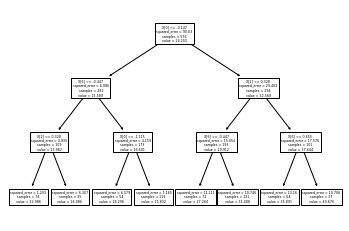

In [352]:
tree.plot_tree(dtr)

**Random Forest**

In [353]:
#Model training for Y1
rf=RandomForestRegressor(n_estimators=100,max_depth=3,max_features='sqrt')
rf.fit(x1_train_scaled,y1_train)

RandomForestRegressor(max_depth=3, max_features='sqrt')

In [354]:
y1_predrf=rf.predict(x1_test_scaled)

In [355]:
df9=pd.DataFrame({'Actual':y1_test,'Predicted':y1_predrf})
df9

,Actual,Predicted
0,11,11.723613
1,15,14.463848
2,12,12.351680
3,12,13.966335
4,19,23.415902
...,...,...
187,12,12.362609
188,12,12.176715
189,32,29.356957
190,40,36.377889


In [356]:
print("R2 Score : ",metrics.r2_score(y1_test,y1_predrf))

R2 Score :  0.9429196214212205


For Y2

In [357]:
#Model training for Y2
rf=RandomForestRegressor(n_estimators=100,max_depth=3,max_features='sqrt')
rf.fit(x2_train_scaled,y2_train)

RandomForestRegressor(max_depth=3, max_features='sqrt')

In [358]:
y2_predrf=rf.predict(x2_test_scaled)

In [359]:
df10=pd.DataFrame({'Actual':y2_test,'Predicted':y2_predrf})
df10

,Actual,Predicted
0,14,15.172276
1,32,30.745353
2,21,17.939821
3,13,14.024724
4,14,15.936319
...,...,...
187,14,14.143212
188,27,30.784078
189,14,15.187916
190,30,31.423342


In [360]:
print("R2 Score : ",metrics.r2_score(y2_test,y2_predrf))

R2 Score :  0.9093535581386267


**Gradient Boosting**

In [361]:
#Model training for Y1
for lr in [0.01,0.05,0.06,0.07,0.1,0.3,0.5,0.8,0.9,1]:
  model=GradientBoostingRegressor(learning_rate=lr)
  model.fit(x1_train_scaled,y1_train)
  print("Learning Rate : ",lr,"Train Score : ",model.score(x1_train_scaled,y1_train),"Test score : ",model.score(x1_test_scaled,y1_test))

Learning Rate :  0.01 Train Score :  0.8271342471392288 Test score :  0.8197569366391607
Learning Rate :  0.05 Train Score :  0.9952403217430349 Test score :  0.9953249285931466
Learning Rate :  0.06 Train Score :  0.9965547166782344 Test score :  0.9963407838719069
Learning Rate :  0.07 Train Score :  0.9971399081519572 Test score :  0.996759864636773
Learning Rate :  0.1 Train Score :  0.9977647092614299 Test score :  0.9972201304784846
Learning Rate :  0.3 Train Score :  0.9986956559457641 Test score :  0.9977747719388366
Learning Rate :  0.5 Train Score :  0.9988958507934304 Test score :  0.997597352269101
Learning Rate :  0.8 Train Score :  0.9990499309279748 Test score :  0.9978588804366217
Learning Rate :  0.9 Train Score :  0.9990852656215216 Test score :  0.9976947317973466
Learning Rate :  1 Train Score :  0.9991414249026371 Test score :  0.9979149467439857


In [362]:
y1_predgb=model.predict(x1_test_scaled)

In [363]:
df11=pd.DataFrame({'Actual':y1_test,'Predicted':y1_predgb})
df11

,Actual,Predicted
0,11,10.937830
1,15,14.692219
2,12,12.309204
3,12,12.085308
4,19,19.264756
...,...,...
187,12,11.973374
188,12,11.900974
189,32,31.702502
190,40,38.830059


In [364]:
print("R2 Score : ",metrics.r2_score(y1_test,y1_predgb))

R2 Score :  0.9979149467439857


For Y2

In [365]:
#Model training for Y2
for lr in [0.01,0.05,0.06,0.07,0.1,0.3,0.5,0.8,0.9,1]:
  model=GradientBoostingRegressor(learning_rate=lr)
  model.fit(x2_train_scaled,y2_train)
  print("Learning Rate : ",lr,"Train Score : ",model.score(x2_train_scaled,y2_train),"Test score : ",model.score(x2_test_scaled,y2_test))

Learning Rate :  0.01 Train Score :  0.8069618403256236 Test score :  0.7762154603037885
Learning Rate :  0.05 Train Score :  0.9721004948675255 Test score :  0.960204366970141
Learning Rate :  0.06 Train Score :  0.9747937859280497 Test score :  0.9628575051213706
Learning Rate :  0.07 Train Score :  0.9762430793590933 Test score :  0.9642054092028858
Learning Rate :  0.1 Train Score :  0.980216661912256 Test score :  0.9687054722568464
Learning Rate :  0.3 Train Score :  0.9901050090108792 Test score :  0.9827771414422081
Learning Rate :  0.5 Train Score :  0.9922250768784434 Test score :  0.9817641365688037
Learning Rate :  0.8 Train Score :  0.9944422761678652 Test score :  0.9838879993909903
Learning Rate :  0.9 Train Score :  0.9941189023630184 Test score :  0.9833680143156553
Learning Rate :  1 Train Score :  0.9946579853777557 Test score :  0.9837298024330843


In [366]:
y2_predgb=model.predict(x2_test_scaled)

In [367]:
df12=pd.DataFrame({'Actual':y2_test,'Predicted':y2_predgb})
df12

,Actual,Predicted
0,14,13.978178
1,32,31.855268
2,21,20.389102
3,13,12.768717
4,14,13.294680
...,...,...
187,14,13.350159
188,27,28.850447
189,14,14.553229
190,30,30.129296


In [368]:
print("R2 Score : ",metrics.r2_score(y2_test,y2_predgb))

R2 Score :  0.9837298024330843


**X G Boost** 

In [369]:
#Model training for Y1
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  XG = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  XG.fit(x1_train_scaled,y1_train) 
  print("Learning rate : ", lr, " Train score : ", XG.score(x1_train_scaled,y1_train), " Cross-Val score : ", np.mean(cross_val_score(XG, x1_train_scaled, y1_train, cv=10)))

Learning rate :  0.01  Train score :  0.21646810825019225  Cross-Val score :  0.20607534848455283
Learning rate :  0.02  Train score :  0.8681806790968409  Cross-Val score :  0.8650575282807171
Learning rate :  0.03  Train score :  0.9680884085041861  Cross-Val score :  0.9660403574047244
Learning rate :  0.04  Train score :  0.9893863096145058  Cross-Val score :  0.9878308717178358
Learning rate :  0.05  Train score :  0.9943572190264987  Cross-Val score :  0.9929660131154989
Learning rate :  0.1  Train score :  0.9976150519798328  Cross-Val score :  0.9966426757204131
Learning rate :  0.11  Train score :  0.9978055593446663  Cross-Val score :  0.9967887941382895
Learning rate :  0.12  Train score :  0.9979206790494808  Cross-Val score :  0.9969641375402644
Learning rate :  0.13  Train score :  0.9979714447650836  Cross-Val score :  0.9968846612261171
Learning rate :  0.14  Train score :  0.998062983664336  Cross-Val score :  0.9968920666097553
Learning rate :  0.15  Train score :  0.

Learning Rate of 0.13 has the best score.

In [370]:
y1_predxg=XG.predict(x1_test_scaled)

In [371]:
df13=pd.DataFrame({'Actual':y1_test,'Predicted':y1_predxg})
df13

,Actual,Predicted
0,11,10.962700
1,15,14.851332
2,12,12.010570
3,12,11.924821
4,19,18.971170
...,...,...
187,12,11.703957
188,12,12.072001
189,32,31.626558
190,40,38.926392


In [372]:
 print("R2 score of XG Boost Model :",XG.score(x1_test_scaled,y1_test)) 

R2 score of XG Boost Model : 0.9974287822426783


For Y2

In [373]:
#Model training for Y2
for lr in [0.01,0.05,0.06,0.07,0.1,0.3,0.5,0.8,0.9,1]:
  XG = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  XG.fit(x2_train_scaled,y2_train) 
  print("Learning rate : ", lr, " Train score : ", XG.score(x2_train_scaled,y2_train), " Cross-Val score : ", np.mean(cross_val_score(XG, x2_train_scaled, y2_train, cv=10)))

Learning rate :  0.01  Train score :  -0.05856540313144021  Cross-Val score :  -0.10239070507660827
Learning rate :  0.05  Train score :  0.9715083472718657  Cross-Val score :  0.9656000977919044
Learning rate :  0.06  Train score :  0.9745598431650093  Cross-Val score :  0.9686298094590862
Learning rate :  0.07  Train score :  0.9761263514437671  Cross-Val score :  0.9702272729526419
Learning rate :  0.1  Train score :  0.9791601382206713  Cross-Val score :  0.9726886628538598
Learning rate :  0.3  Train score :  0.9894579743644684  Cross-Val score :  0.9833218190260622
Learning rate :  0.5  Train score :  0.9919938647372886  Cross-Val score :  0.9842311124018245
Learning rate :  0.8  Train score :  0.9946556966758028  Cross-Val score :  0.9853203685095157
Learning rate :  0.9  Train score :  0.9943810680553216  Cross-Val score :  0.9859956284972948
Learning rate :  1  Train score :  0.9934901911529701  Cross-Val score :  0.9853011823853096


Learning rate of 0.8 has best Cross Val score.

In [374]:
y2_predxg=XG.predict(x2_test_scaled)

In [375]:
df14=pd.DataFrame({'Actual':y2_test,'Predicted':y2_predxg})
df14

,Actual,Predicted
0,14,14.366240
1,32,32.441238
2,21,20.267616
3,13,12.097199
4,14,14.244057
...,...,...
187,14,13.456738
188,27,28.935539
189,14,14.968916
190,30,31.400183


In [376]:
 print("R2 score of XG Boost Model :",XG.score(x2_test_scaled,y2_test)) 

R2 score of XG Boost Model : 0.9824419231131539


**Best R2 score:**

In [377]:
print("R2 Score of Linear regression Y1 : ",metrics.r2_score(y1_test,y1_predlir))
print("R2 Score of Logistic regression Y1: ",metrics.r2_score(y1_test,y1_predlog))
print("R2 Score of KNN Y1 : ",metrics.r2_score(y1_test,y1_predknn))
print("R2 Score of decision tree Y1 : ",metrics.r2_score(y1_test,y1_preddtr))
print("R2 Score of Random forest Y1 : ",metrics.r2_score(y1_test,y1_predrf))
print("R2 Score of Gradient Boosting Model Y1 : ",metrics.r2_score(y1_test,y1_predgb))
print("R2 score of XG Boost Model Y1 :",XG.score(x1_test_scaled,y1_test)) 
print("\n")
print("R2 Score of Logistic regression Y2 : ",metrics.r2_score(y2_test,y2_predlog))
print("R2 Score of KNN Y2 : ",metrics.r2_score(y2_test,y2_predknn))
print("R2 Score of decision tree Y2 : ",metrics.r2_score(y2_test,y2_preddtr))
print("R2 Score of Random forest Y2 : ",metrics.r2_score(y2_test,y2_predrf))
print("R2 Score of Gradient Boosting Model Y2 : ",metrics.r2_score(y2_test,y2_predgb))
print("R2 Score of Linear regression Y2 : ",metrics.r2_score(y2_test,y2_predlir))
print("R2 score of XG Boost Model Y2:",XG.score(x2_test_scaled,y2_test)) 

R2 Score of Linear regression Y1 :  0.8592158885764636
R2 Score of Logistic regression Y1:  0.890369474973359
R2 Score of KNN Y1 :  0.9300233097761449
R2 Score of decision tree Y1 :  0.9336544191757209
R2 Score of Random forest Y1 :  0.9429196214212205
R2 Score of Gradient Boosting Model Y1 :  0.9979149467439857
R2 score of XG Boost Model Y1 : 0.9110999413025271


R2 Score of Logistic regression Y2 :  0.8506177418198765
R2 Score of KNN Y2 :  0.9043646458737258
R2 Score of decision tree Y2 :  0.9029084264302059
R2 Score of Random forest Y2 :  0.9093535581386267
R2 Score of Gradient Boosting Model Y2 :  0.9837298024330843
R2 Score of Linear regression Y2 :  0.8759474499012134
R2 score of XG Boost Model Y2: 0.9824419231131539


  For Y1 target R2 score of   0.9977362611384989 of Gradient Boosting model is the best model.

  For Y2 target R2 score of    0.9850970645608987 of Gradient Boosting model is the best model.

Now finding the important feature to calculating Heating load and cooling load using sklearn's feature selection module.

In [378]:
estimator=GradientBoostingRegressor()
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x1_train_scaled,y1_train)
list(zip(['X1','X2','Transformed_X3','X4','X5','Transformed_X6','X7','Transformed_X8'],selector.support_))

[('X1', True),
 ('X2', True),
 ('Transformed_X3', False),
 ('X4', True),
 ('X5', True),
 ('Transformed_X6', False),
 ('X7', False),
 ('Transformed_X8', False)]

 
Relative Compactness(X1),Surface Area(X2),Roof Area(X4) and Overall Height(X5)are the important feature to determine the Heating Load(Y1).

In [379]:
estimator=GradientBoostingRegressor()
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x2_train_scaled,y2_train)
list(zip(['X1','X2','Transformed_X3','X4','X5','Transformed_X6','X7','X8'],selector.support_))

[('X1', True),
 ('X2', True),
 ('Transformed_X3', False),
 ('X4', True),
 ('X5', True),
 ('Transformed_X6', False),
 ('X7', False),
 ('X8', False)]

Similarly, Relative Compactness(X1),Surface Area(X2),Roof Area(X4) and Overall Height(X5)are the important feature to determine the Cooling Load(Y2).